<a href="https://colab.research.google.com/github/Mahendra275/fmml2021/blob/main/Lab1_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 4 October 2021 Monday <br>



In [41]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import numpy as np
import plotly.express as px
import pandas as pd


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [19]:
topic1 = 'Giraffe'
topic2 = 'computer'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



This is what the text looks like:

In [ ]:
fr2

"Un ordinateur est un système de traitement de l'information programmable tel que défini par Alan Turing et qui fonctionne par la lecture séquentielle d'un ensemble d'instructions, organisées en programmes, qui lui font exécuter des opérations logiques et arithmétiques. Sa structure physique actuelle fait que toutes les opérations reposent sur la logique binaire et sur des nombres formés à partir de chiffres binaires. Dès sa mise sous tension, un ordinateur exécute, l'une après l'autre, des instructions qui lui font lire, manipuler, puis réécrire un ensemble de données déterminées par une mémoire morte d'amorçage. Des tests et des sauts conditionnels permettent de passer à l'instruction suivante et donc d'agir différemment en fonction des données ou des nécessités du moment ou de l'environnement.\nLes données à manipuler sont acquises soit par la lecture de mémoires, soit en provenance de périphériques internes ou externes (déplacement d'une souris, touche appuyée sur un clavier, dépla

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [20]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [21]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [22]:
print(eng1)

thegiraffegiraffaisanafricanartiodactylmammalthetallestlivingterrestrialanimalandthelargestruminantitistraditionallyconsideredtobeonespeciesgiraffacamelopardaliswithninesubspecieshowevertheexistenceofuptonineextantgiraffespecieshasbeendescribedbaseduponresearchintothemitochondrialandnucleardnaaswellasmorphologicalmeasurementsofgiraffasevenotherprehistoricspeciesknownfromfossilsareextinctthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsdistinctivecoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheiroffspringorbachelorherdsof

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [23]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  #print(combined)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  #print(*zipped_sorted)
  #print(list(zip(*zipped_sorted)))
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

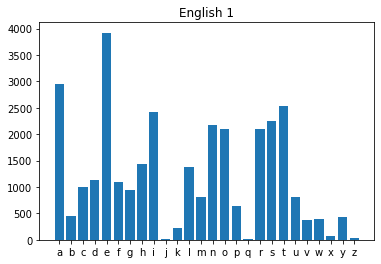

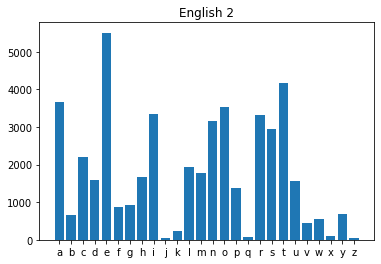

In [24]:
unigram_eng1 = Counter(ngrams(eng1,1))
#print(unigram_eng1)
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

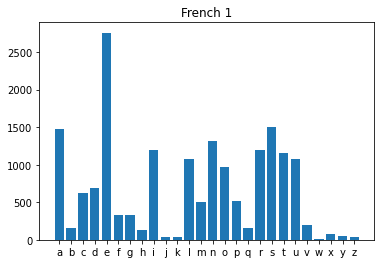

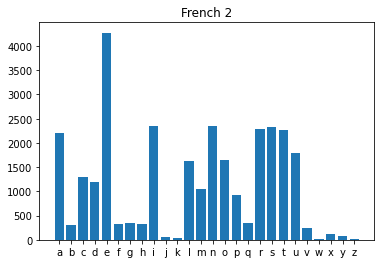

In [25]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

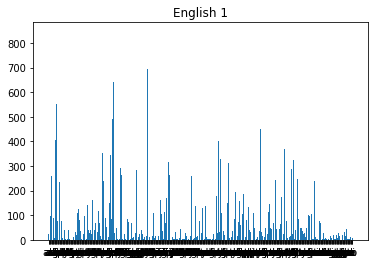

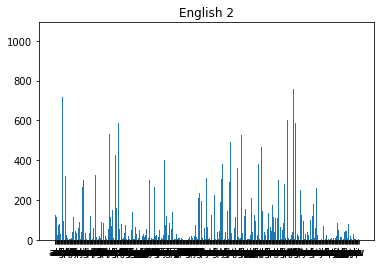

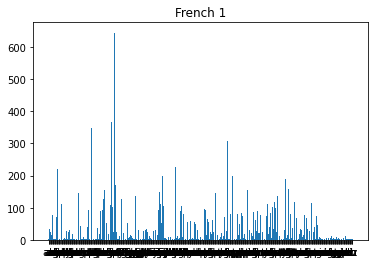

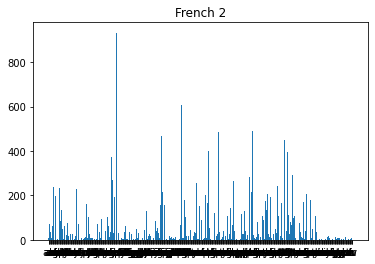

In [26]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
#print(bigram_eng1)
#print(len(bigram_eng1))
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_fr1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [27]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

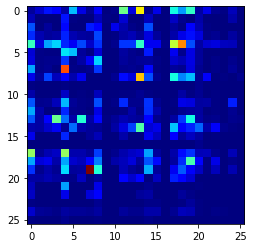

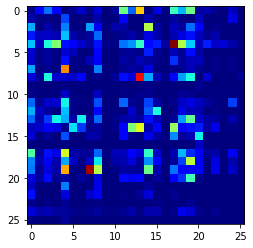

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

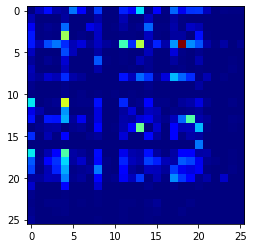

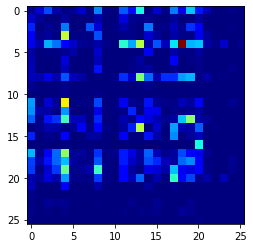

In [28]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [29]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  #print(f)
  arg = np.argsort(-f)
  #print(arg)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [30]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('l', 'a') : 12.0
('n', 'g') : 9.0
('a', 't') : 9.0
('u', 'l') : 8.0
('t', 'a') : 7.0
('a', 'r') : 7.0
('a', 'c') : 6.0
('u', 'n') : 6.0
('n', 't') : 6.0
('g', 'u') : 6.0

English 2:
('o', 'c') : 35.0
('c', 'l') : 35.0
('l', 'c') : 35.0
('c', 'o') : 28.0
('r', 'e') : 16.0
('e', 'f') : 12.0
('t', 'e') : 10.0
('i', 'n') : 9.0
('c', 'r') : 7.0
('n', 'a') : 7.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 276.0
('r', 'a') : 230.0
('l', 'a') : 228.0

French 2:
('e', 's') : 933.0
('l', 'e') : 609.0
('d', 'e') : 550.0
('o', 'n') : 533.0
('e', 'n') : 532.0
('r', 'e') : 490.0
('n', 't') : 487.0
('i', 'n') : 468.0
('t', 'e') : 448.0
('n', 'e') : 400.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [33]:
#try with language hindi and telugu

wikipedia.set_lang('hi') 
hin1 = wikipedia.page(topic1).content
hin2 = wikipedia.page(topic2).content
wikipedia.set_lang('te')
tel1 = wikipedia.page(topic1).content
tel2 = wikipedia.page(topic2).content

In [ ]:
print(hin1)
print(tel2)

In [35]:
def cleanup2(text):
  return ''.join(text.split())

In [36]:
hin1 = cleanup2(hin1)
hin2 = cleanup2(hin2)
tel1 = cleanup2(tel1)
tel2 = cleanup2(tel2)

In [37]:
print(hin1)

खुरदारयाअंग्युलेट(ungulate)ऐसेस्तनधारीजानवरोंकोकहाजाताहैजोचलतेसमयअपनाभारअपनेपाऊँकीउँगलियोंकेअंतिमभागोंपरउठातेहैं।यहभारसहनकरनेकेलिएऐसेपशुओंकेपाऊँअक्सरखुरोंकेरूपमेंहोतेहैं।स्तनधारियोंकेबहुतसेगणखुरदारहोतेहैं।बहुतसेजाने-पहचानेप्राणीइसश्रेणीमेंआतेहैं,जिसमेंघोड़ा,गधा,ज़ेब्रा,गाय,गेंडा,ऊँट,दरियाईघोड़ा,सूअर,बकरी,तापीर,हिरन,जिराफ़,ओकापी,साइगाऔररेनडियरशामिलहैं।किसीज़मानेमें'खुरदार'टैक्सोन(जीवजातियोंकासमूह)एकक्लेडमानाजाताथा,यानियहसमझाजाताथाकिखुरकिसीएकजातिमेंक्रम-विकास(एवोल्यूशन)सेउत्पन्नहुएऔरउसजातिसेआगेउत्पन्नहरवंशजजातिखुरदारहै।वर्तमानकालमेंइसविचारकोलेकरजीववैज्ञानिकोंमेंमतभेदहैऔरबहुतसेविद्वानोंकेअनुसारभिन्नखुरदारजातियाँएक-दूसरेसेउतनीअनुवांशिक(जेनेटिक)गहराईसेसम्बंधितनहींहैंजितनापहलेसमझाजाताथा।अधिकतरखुरदारीशाकाहारीहोतेहैं।ध्यानदेंकिशरीरोंऔरअनुवांशिकीकीजाँचसेकुछपानीमेंविचारनेवालेजानवरोंकोभीखुरदारकीश्रेणीमेंडालाजाताहैहालाँकिकड़ीनज़रसेदेखाजाएतोइनकेखुरनहींहोते।==उपश्रेणियाँ==शुरूमेंवैज्ञानिकसभीखुरदारोंकोएकहीजीववैज्ञानिकगणकाहिस्सामानतेथे,लेकिनअबइन्हेंकईअलगश्रेणियोंमेंविभाजितकियाजाताहै:पेरिसोडैकटिलायाविष

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2305 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2306 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2309 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2310 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2311 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2312 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2313 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backe

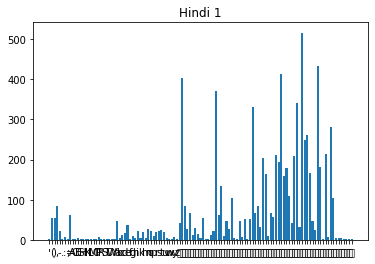

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2317 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2416 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 2317 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 2416 missing from current font.



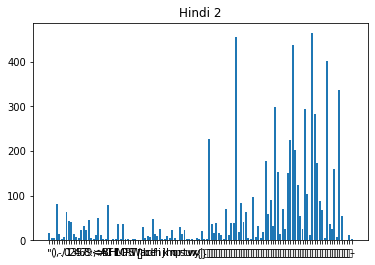

In [43]:
unigram_hin1 = Counter(ngrams(hin1,1))
plothistogram(unigram_hin1)
plt.title('Hindi 1')
plt.show()
unigram_hin2 = Counter(ngrams(hin2,1))
plothistogram(unigram_hin2)
plt.title('Hindi 2')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3074 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3075 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3077 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3078 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3079 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3080 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3081 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backe

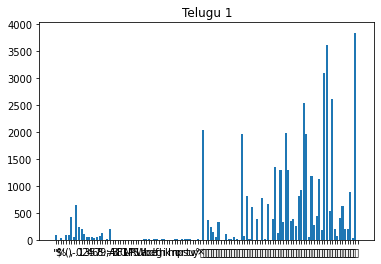

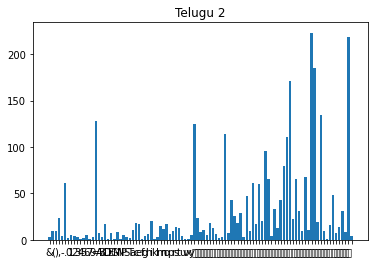

In [46]:
unigram_tel1 = Counter(ngrams(tel1,1))
plothistogram(unigram_tel1)
plt.title('Telugu 1')
plt.show()
unigram_tel2 = Counter(ngrams(tel2,1))
plothistogram(unigram_tel2)
plt.title('Telugu 2')
plt.show()

From histographs of unigrams are we observe that the most least frequent characters nearly match.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2326 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2335 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2309 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2319 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2325 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2327 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2328 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backe

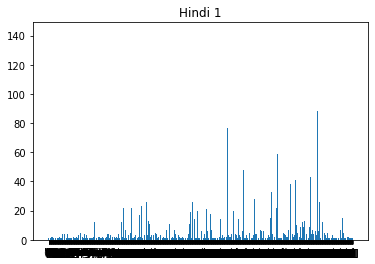

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2416 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 2317 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 2416 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 2317 missing from current font.



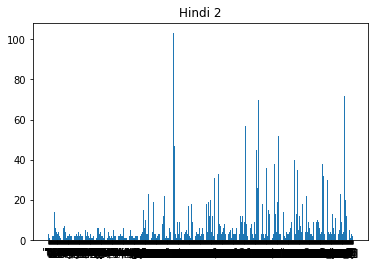

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3077 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3078 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3079 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3080 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3081 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3086 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3093 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backe

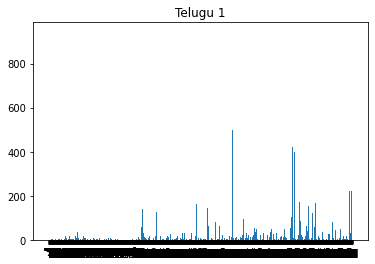

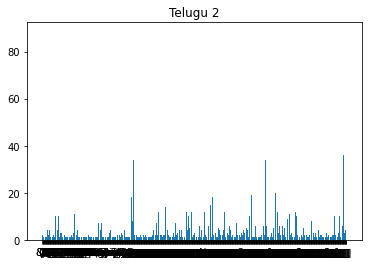

In [47]:
bigram_hin1 = Counter(ngrams(hin1,2)) # bigrams
plothistogram(bigram_hin1)
plt.title('Hindi 1')
plt.show()

bigram_hin2 = Counter(ngrams(hin2,2))
plothistogram(bigram_hin2)
plt.title('Hindi 2')
plt.show()

bigram_tel1 = Counter(ngrams(tel1,2))
plothistogram(bigram_tel1)
plt.title('Telugu 1')
plt.show()

bigram_tel2 = Counter(ngrams(tel2,2))
plothistogram(bigram_tel2)
plt.title('Telugu 2')
plt.show()

In [55]:
def plotbihistogram2(ngram):
  mn, mx = float('inf'), float('-inf')
  for i in ngram:
    mn = min(mn, ord(i[0]), ord(i[1]))
    mx = max(mx, ord(i[0]), ord(i[1]))
  sz = mx - mn + 1
  print(sz)
  freq = np.zeros((sz,sz))
  for ii in range(sz):
    for jj in range(sz):
      freq[ii,jj] = ngram[(chr(ii), chr(jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq
ord(hin1[0])

2326

2377


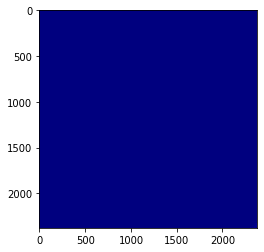

8178


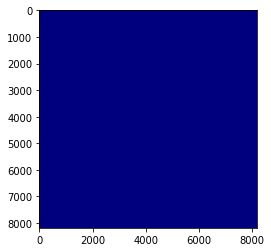

In [57]:
bihin1 = plotbihistogram2(bigram_hin1)
plt.show()
bihin2 = plotbihistogram2(bigram_hin2)

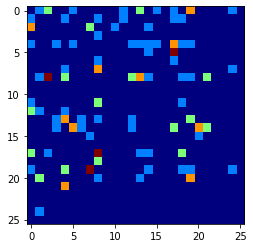

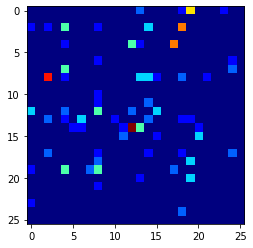

In [50]:
bitel1 = plotbihistogram(bigram_tel1)
plt.show()
bitel2 = plotbihistogram(bigram_tel2)

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

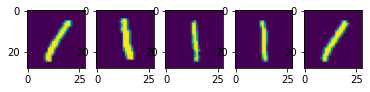

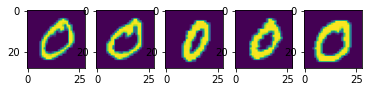

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

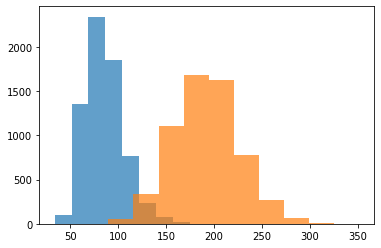

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

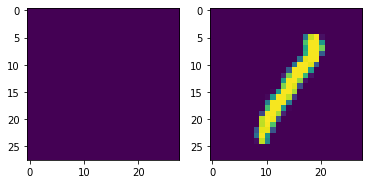

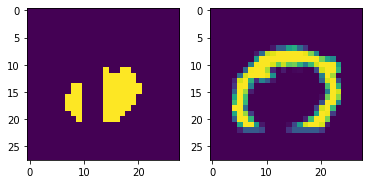

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

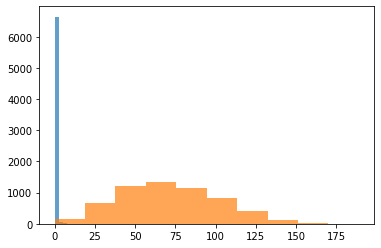

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


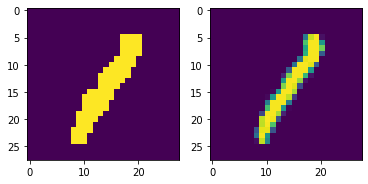

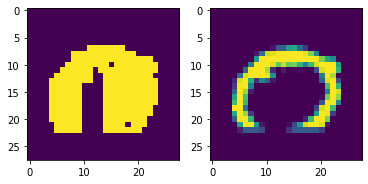

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

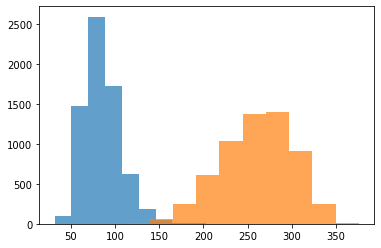

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

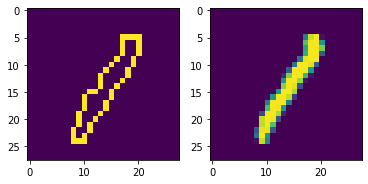

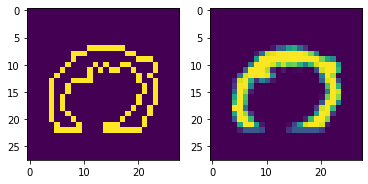

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

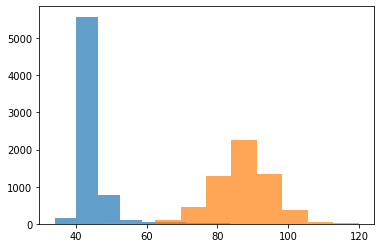

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

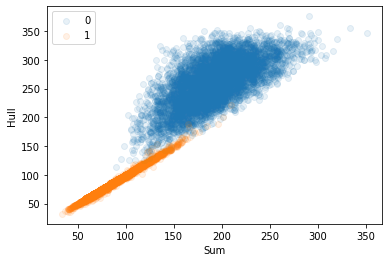

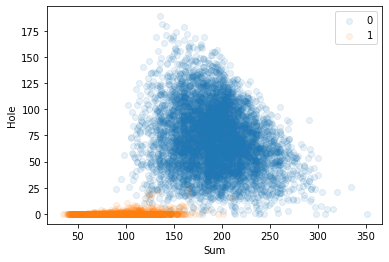

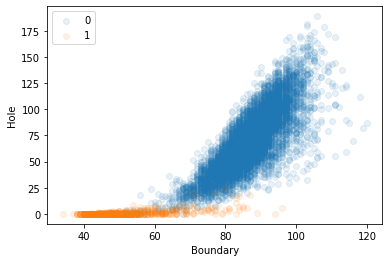

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?